## Import Libraries

In [99]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score , classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from sklearn import metrics

%matplotlib inline

## Load the Data

In [100]:
df = pd.read_csv("../Datasets/final_data1.csv")

In [101]:
df.shape

(9077, 20)

In [102]:
df.head(2)

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


In [103]:
df.drop(columns='Unnamed: 0' , inplace = True)

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [104]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value


In [105]:
# Completeness
df.isnull().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [106]:
numeric_col = [col for col in df.columns if df[col].dtype != "object"]
categorical_col = [col for col in df.columns if df[col].dtype == "object"]

In [107]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


<Axes: xlabel='current_value', ylabel='age'>

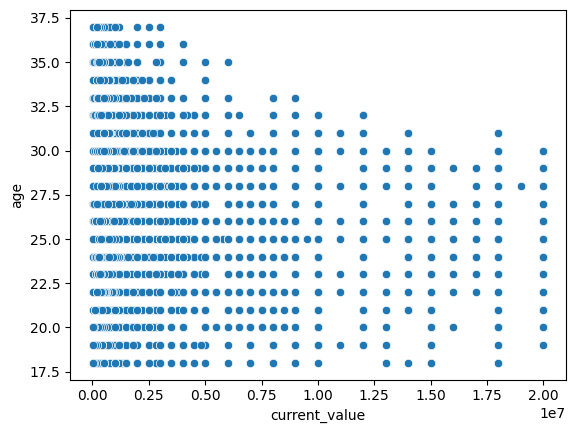

In [108]:
sns.scatterplot(x='current_value' , y='age' , data=df)

In [109]:
df = df[['age' , 'current_value']]

In [110]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [123]:
dbscan = DBSCAN(eps=0.2, min_samples=5)

In [124]:
dbscan.fit(df_scaled) 

DBSCAN(eps=0.2)

In [125]:
df['Cluster'] = dbscan.labels_

In [126]:
df['Cluster'].value_counts()

Cluster
34    697
25    662
12    620
33    615
9     613
     ... 
54      5
56      5
62      5
66      5
69      5
Name: count, Length: 72, dtype: int64

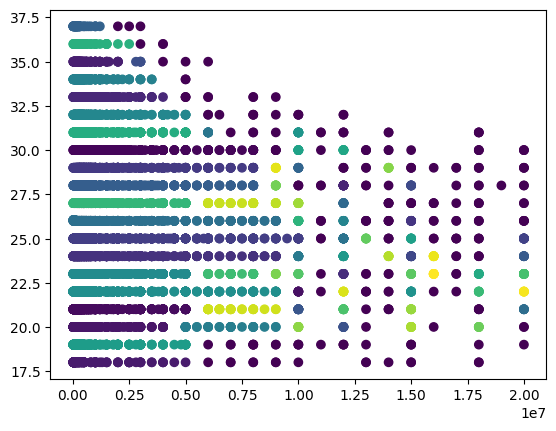

In [127]:
plt.scatter(x=df['current_value'] , y=df['age'] , c=df['Cluster'])
plt.show()

In [122]:
sil = silhouette_score(df, dbscan.fit_predict(df))
print("silhouette_score:" , sil)

silhouette_score: 0.7576540431898569


In [131]:
import joblib
joblib.dump(dbscan, 'DBSCAN.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']